In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [2]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


# Explorations

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

## Drop Merchant Columns

In [4]:
print(df.loc[:,df.columns.str.startswith("merchant")].columns.values)

['merchant_title' 'merchant_name' 'merchant_info_subtitle'
 'merchant_rating_count' 'merchant_rating' 'merchant_id'
 'merchant_has_profile_picture' 'merchant_profile_picture']


In [5]:
df.drop(['merchant_has_profile_picture', 'merchant_profile_picture','merchant_title' ,'merchant_name', 'merchant_info_subtitle'], inplace=True, axis=1)

## Null Columns 

In [6]:
df.loc[:,df.isnull().sum()>0].columns


Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'product_color',
       'product_variation_size_id', 'has_urgency_banner', 'urgency_text',
       'origin_country'],
      dtype='object')

## Drop Theme column
has only one value *summer* so its no-use for analysis or model prediction

In [7]:
df.theme.value_counts()

summer    1573
Name: theme, dtype: int64

In [8]:
df.drop('theme', axis=1, inplace=True)

## Title and Title_orig column

Title and title_orig columns has same value, (use the one with english tilte -> title_orig) and drop title column.


In [9]:
df.drop("title", axis=1, inplace=True)

## Drop Urgency Text and Urgency Banner

Both columns have null values


In [10]:

df.drop(['urgency_text','has_urgency_banner'], inplace=True,axis=1)

Fill the rest of null-columns by value "unknown".

In [11]:
df.fillna(value="unknown", inplace=True)

## Currency Column

In [12]:
df.currency_buyer.unique()

array(['EUR'], dtype=object)

currency is only in euros,so drop columns

In [13]:
df.drop('currency_buyer', inplace=True, axis=1)

## Crawl Month

In [14]:
df.crawl_month.unique()

array(['2020-08'], dtype=object)

In [15]:
df.drop('crawl_month', inplace=True, axis=1)

## Badges Columns
convert **'badge_local_product', 'badge_product_quality', 'badge_fast_shipping'** into categorical values


In [16]:
df.loc[:,df.columns.str.startswith('badge')].columns

Index(['badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping'],
      dtype='object')

In [17]:
df[['badge_local_product', 'badge_product_quality','badge_fast_shipping']] = df[['badge_local_product', 'badge_product_quality','badge_fast_shipping']].astype(str)

## Origin Country

In [18]:
eda_df = df.copy()

## Rename country columns for clear meaning

In [19]:
eda_df.origin_country = eda_df.origin_country.str.replace( 'CN',"China" )
eda_df.origin_country = eda_df.origin_country.str.replace( "US","United States of America" )
eda_df.origin_country = eda_df.origin_country.str.replace( "unknown","unknown" )
eda_df.origin_country = eda_df.origin_country.str.replace( "VE","Venezuela" )
eda_df.origin_country = eda_df.origin_country.str.replace( 'GB',"Great Britain" )
eda_df.origin_country = eda_df.origin_country.str.replace( 'SG',"Singapore" )
eda_df.origin_country = eda_df.origin_country.str.replace( 'AT',"Austria" )
    

In [27]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import plotly.graph_objs as go

In [21]:
labels = eda_df.origin_country.value_counts(normalize=True).index.values

values  = eda_df.origin_country.value_counts().values

# Create Pie Chart

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Country of Origin of Product in Wish", legend_title="Countries", template="plotly_dark")



In [22]:
# Lets create so called discounts column by subtracting the price from  retail_price

eda_df['discounted_price'] = eda_df['retail_price'] - eda_df['price']
prices_by_country = eda_df[['price','discounted_price','retail_price','origin_country']].groupby('origin_country').mean()

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discounted_price, name="Discounted Price"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Avg Discount Prices", template="plotly_dark", legend_title="Legend")


## Prices In China 

In [24]:
eda_df[eda_df.origin_country=="China"]['price'].describe()

count    1516.000000
mean        8.341629
std         3.940071
min         1.000000
25%         5.830000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

In [25]:
eda_df[eda_df.origin_country=="China"]['retail_price'].describe()

count    1516.000000
mean       23.294195
std        30.634789
min         1.000000
25%         7.000000
50%        10.000000
75%        26.000000
max       252.000000
Name: retail_price, dtype: float64

## Shipping Options and Prices

In [26]:
eda_df.loc[:,eda_df.columns.str.startswith("shipping")].columns

Index(['shipping_option_name', 'shipping_option_price', 'shipping_is_express'], dtype='object')

In [27]:
eda_df['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Standardowa wysyłka           3
Livraison Express             3
Стандартная доставка          3
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

In [28]:

livrasion_prices = eda_df[eda_df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency = eda_df[eda_df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_dark")



In [29]:
eda_df['shipping_is_express'].value_counts()

0    1569
1       4
Name: shipping_is_express, dtype: int64

In [30]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_orig                   1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   int64  
 5   rating                       1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   rating_five_count            1573 non-null   object 
 8   rating_four_count            1573 non-null   object 
 9   rating_three_count           1573 non-null   object 
 10  rating_two_count             1573 non-null   object 
 11  rating_one_count             1573 non-null   object 
 12  badges_count                 1573 non-null   int64  
 13  badge_local_produc

## Products and Sales

small df thats related to product and their sales

In [31]:
product_cat_columns = eda_df.loc[:,eda_df.columns.str.startswith("product")].columns.values


In [32]:
eda_df[product_cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   product_color                1573 non-null   object
 1   product_variation_size_id    1573 non-null   object
 2   product_variation_inventory  1573 non-null   int64 
 3   product_url                  1573 non-null   object
 4   product_picture              1573 non-null   object
 5   product_id                   1573 non-null   object
dtypes: int64(1), object(5)
memory usage: 73.9+ KB


In [33]:
eda_df[product_cat_columns].head()

,product_color,product_variation_size_id,product_variation_inventory,product_url,product_picture,product_id
0,white,M,50,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,green,XS,50,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,leopardprint,XS,1,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a
3,black,M,50,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca
4,yellow,S,1,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70


## drop links 

In [34]:
df.drop(['product_picture','product_url'], inplace=True, axis=1)
eda_df.drop(['product_picture','product_url'], inplace=True, axis=1)

In [35]:
eda_df_products = eda_df[['tags', 'price', 'units_sold', 'rating','rating_count', 'product_id','badges_count', 'badge_product_quality']].copy().sort_values(['units_sold','badges_count'], ascending=False)

eda_df_products_by_id = eda_df_products.set_index('product_id')

In [36]:
eda_df_products_by_id.head()

,tags,price,units_sold,rating,rating_count,badges_count,badge_product_quality
product_id,,,,,,,
5b07a7c6e997b33c6f9947da,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",5.00,100000,3.83,17980,0,0
544b079d1280fa28eee9b380,"Mini,Strapless Dress,Spaghetti Strap,Tank,Tops...",5.77,100000,4.10,20744,0,0
54bdf18039b8c045f118936a,"roupas femininas,womens dresses,Lace,gowns,Lon...",8.00,100000,3.76,11062,0,0
53897eeeafddf70c91af1cda,"Summer,Plus Size,Cotton T Shirt,chiffon,Long S...",5.00,100000,3.98,13789,0,0
567cb0925ff12c4829f07dfb,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",7.00,100000,3.82,11913,0,0


In [37]:
# Top 10 products sold for women
eda_df_products.loc[eda_df_products.tags.str.contains('[Ww]omen')].head(10).index

Int64Index([17, 92, 214, 251, 1018, 1168, 40, 84, 957, 1466], dtype='int64')

In [38]:
# Top 10 products in general
eda_df_products.head(10).index 

Int64Index([17, 92, 214, 251, 1018, 1168, 40, 84, 957, 1466], dtype='int64')

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
eda_df_products_by_id_norm = eda_df_products_by_id.copy()
eda_df_products_by_id_norm.iloc[:,1:] = scaler.fit_transform(eda_df_products_by_id_norm.iloc[:,1:])

In [40]:
fig = go.Figure()

fig.add_trace(go.Bar(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).units_sold,name="Units Sold"  ))
fig.add_trace(go.Scatter(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).price, mode="lines+markers", name="Price" ))
fig.add_trace(go.Scatter(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).rating_count,mode="lines+markers",name="Rating Counts"  ))
fig.add_trace(go.Scatter(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).rating,mode="lines+markers",name="Avg. Rating"  ))

fig.update_layout(title="Top 20 Products Sold", legend_title="Features")

In [41]:
eda_df_products_by_id.head(20).describe()

,price,units_sold,rating,rating_count,badges_count
count,20.000000,20.000000,20.0000,20.000000,20.000000
mean,6.857000,65000.000000,3.8725,12256.950000,0.200000
std,2.487472,23508.117299,0.2710,4543.579408,0.410391
min,3.000000,50000.000000,3.3500,5359.000000,0.000000
25%,5.502500,50000.000000,3.7425,8847.250000,0.000000
50%,7.000000,50000.000000,3.8350,11660.500000,0.000000
75%,8.000000,100000.000000,4.0250,15287.000000,0.000000
max,15.000000,100000.000000,4.4100,20744.000000,1.000000


In [42]:
eda_df_products_by_id.head(10)

,tags,price,units_sold,rating,rating_count,badges_count,badge_product_quality
product_id,,,,,,,
5b07a7c6e997b33c6f9947da,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",5.00,100000,3.83,17980,0,0
544b079d1280fa28eee9b380,"Mini,Strapless Dress,Spaghetti Strap,Tank,Tops...",5.77,100000,4.10,20744,0,0
54bdf18039b8c045f118936a,"roupas femininas,womens dresses,Lace,gowns,Lon...",8.00,100000,3.76,11062,0,0
53897eeeafddf70c91af1cda,"Summer,Plus Size,Cotton T Shirt,chiffon,Long S...",5.00,100000,3.98,13789,0,0
567cb0925ff12c4829f07dfb,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",7.00,100000,3.82,11913,0,0
571adeab62cce546f1a46bc0,"slim dress,Mini,Elegant,Dress,Mini dress,turtl...",5.67,100000,3.53,18393,0,0
556fbe8595528719e004fa27,"blouse,Mini,Fashion,longtop,Shirt,kaftandresse...",9.00,50000,4.26,5359,1,1
5ad987d8918dae087d633040,"blouse,Summer,Plus Size,Tank,Lace,Tops,topsamp...",7.00,50000,4.41,17444,1,1
57cfd9cc1640562050e48bec,"Mini,Fashion,Necks,Sleeve,Summer,Dress,crew ne...",6.00,50000,4.20,12880,1,1


## Discounts, Ratings and Sales

In [43]:
dis_rat_slaes = eda_df[['rating', 'product_id', 'units_sold', 'price','discounted_price']]
dis_rat_slaes.set_index('product_id').head()

,rating,units_sold,price,discounted_price
product_id,,,,
5e9ae51d43d6a96e303acdb0,3.76,100,16.00,-2.00
58940d436a0d3d5da4e95a38,3.45,20000,8.00,14.00
5ea10e2c617580260d55310a,3.57,100,8.00,35.00
5cedf17ad1d44c52c59e4aca,4.03,5000,8.00,0.00
5ebf5819ebac372b070b0e70,3.10,100,2.72,0.28


In [44]:
bins_per_1k= [i for i in range(0,101001,1000)]
labels_bins_per_1k = [str(vals)[:-3]+"k's" for vals in bins_per_1k[1:]]

In [45]:
bins_per_1k_units = pd.cut(dis_rat_slaes.units_sold,bins_per_1k, labels=labels_bins_per_1k )

In [46]:
dis_rat_slaes['bins_per_1k_units'] = bins_per_1k_units

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_16056/4269765972.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
dis_rat_slaes.head()

,rating,product_id,units_sold,price,discounted_price,bins_per_1k_units
0,3.76,5e9ae51d43d6a96e303acdb0,100,16.00,-2.00,1k's
1,3.45,58940d436a0d3d5da4e95a38,20000,8.00,14.00,20k's
2,3.57,5ea10e2c617580260d55310a,100,8.00,35.00,1k's
3,4.03,5cedf17ad1d44c52c59e4aca,5000,8.00,0.00,5k's
4,3.10,5ebf5819ebac372b070b0e70,100,2.72,0.28,1k's


In [48]:
dis_rat_slaes_per_1k_units_sold = dis_rat_slaes.groupby('bins_per_1k_units').agg('mean')

dis_rat_slaes_per_1k_units_sold

,rating,units_sold,price,discounted_price
bins_per_1k_units,,,,
1k's,3.802270,437.089269,8.290152,15.585442
2k's,NaN,NaN,NaN,NaN
3k's,NaN,NaN,NaN,NaN
4k's,NaN,NaN,NaN,NaN
5k's,3.820092,5000.000000,8.483088,11.950092
...,...,...,...,...
97k's,NaN,NaN,NaN,NaN
98k's,NaN,NaN,NaN,NaN
99k's,NaN,NaN,NaN,NaN


## drop the NAN columns 

In [49]:
dis_rat_slaes_per_1k_units_sold.dropna(how='all', inplace=True, axis=0)

In [50]:
dis_rat_slaes_per_1k_units_sold

,rating,units_sold,price,discounted_price
bins_per_1k_units,,,,
1k's,3.802270,437.089269,8.290152,15.585442
5k's,3.820092,5000.000000,8.483088,11.950092
10k's,3.896836,10000.000000,8.313559,12.341808
20k's,3.867961,20000.000000,8.729612,18.202427
50k's,3.903529,50000.000000,6.962353,20.920000
100k's,3.836667,100000.000000,6.073333,19.593333


In [51]:
#Plots

fig = go.Figure()


fig.add_trace(go.Bar(x=dis_rat_slaes_per_1k_units_sold.index.values,y=dis_rat_slaes_per_1k_units_sold.price, name="Price" ))
fig.add_trace(go.Scatter(x=dis_rat_slaes_per_1k_units_sold.index.values,y=dis_rat_slaes_per_1k_units_sold.discounted_price,mode="lines+markers",name="Discounted Price"  ))
fig.add_trace(go.Bar(x=dis_rat_slaes_per_1k_units_sold.index.values,y=dis_rat_slaes_per_1k_units_sold.rating,name="Avg. Rating"  ))

fig.update_layout(title="Product Sales Per 1k Bins", legend_title="Features", xaxis_title="Units Sold", yaxis_title="Avg Values per 1000")

## Correlation Heatmap

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def customized_heatmap(corr_df):
    corr_df =corr_df.iloc[1:,:-1].copy()  

    
    # Get only half portion of corr_df to avoid repitition, so create mask    
    mask = np.triu(np.ones_like(corr_df), k=1)
    
     
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    plt.title("Heatmap Corrleation")
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap='rainbow', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.4 < t < 0.4:

#         if -0.5 < t < 0.5:
            text.set_text('')        
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks( size='x-large')
    plt.yticks(rotation=0, size='x-large')
    plt.show()

In [70]:
!pip install dython

In [54]:
# Import dython to check correlations
from dython.nominal import associations


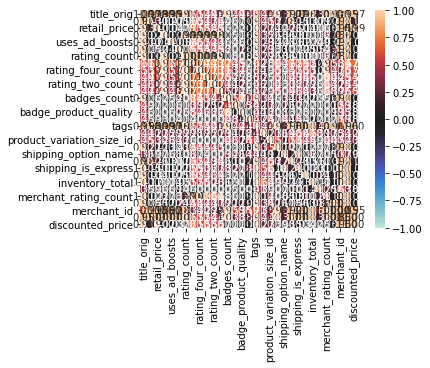

In [57]:
assoc = associations(eda_df,plot=False)
corr_eda_df_dython = assoc['corr']


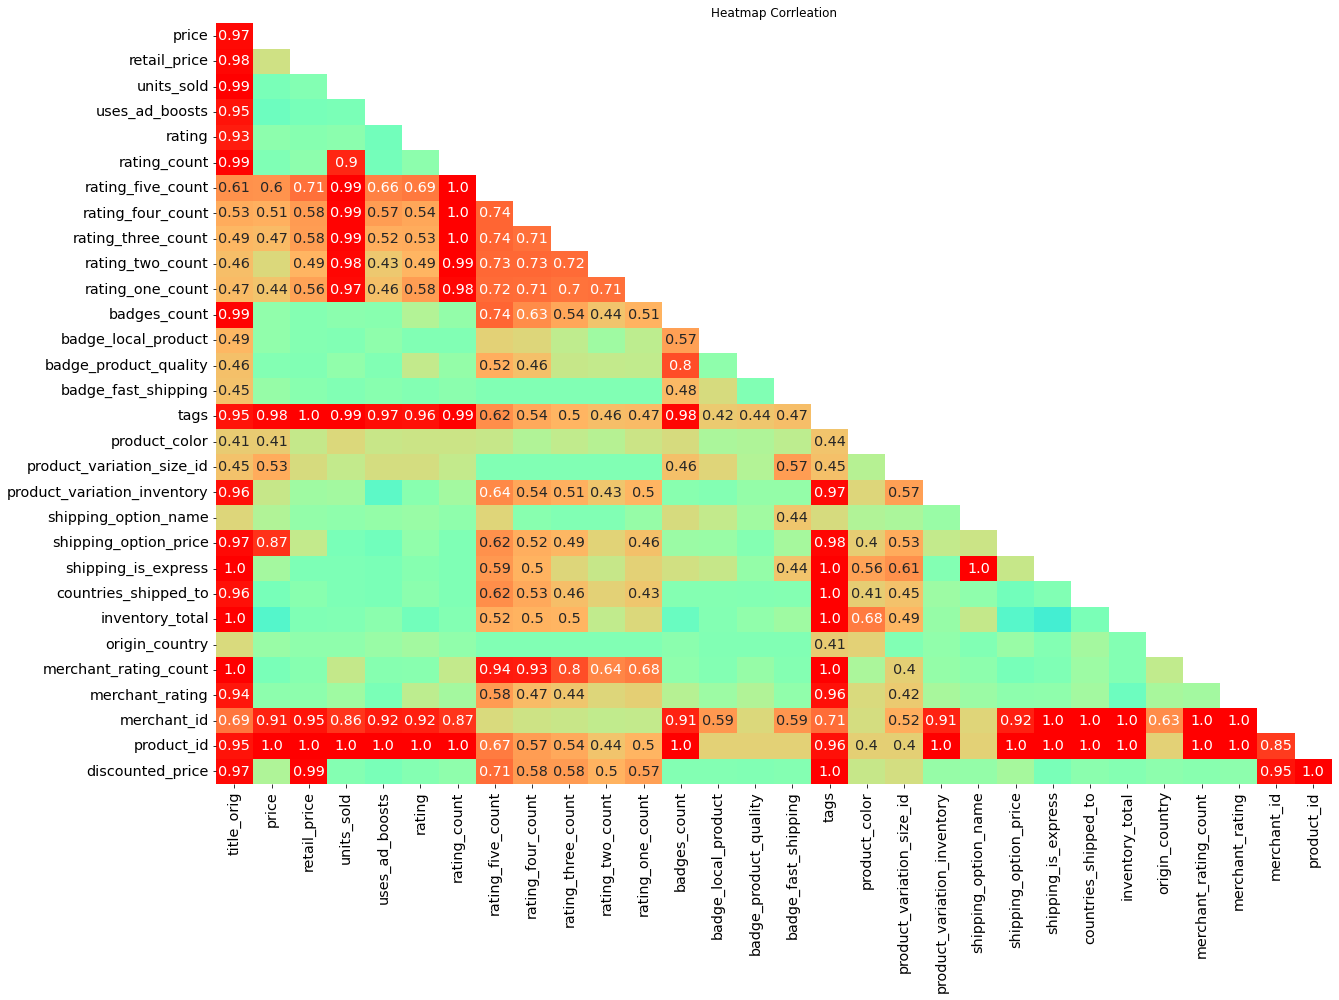

In [58]:
customized_heatmap(corr_eda_df_dython)

# Preprocessing

In [55]:
preprocess_df = eda_df.copy()

## Ratings
<2.5 = Low, 2.5 <= medium < 3.75, >3.75 = high 

In [56]:
preprocess_df.loc[:,preprocess_df.columns.str.startswith("rating")].columns

Index(['rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count'],
      dtype='object')

In [57]:
preprocess_df.drop([ 'rating_five_count', 'rating_four_count','rating_three_count','rating_two_count', 'rating_one_count'], axis=1, inplace=True)

In [58]:
def five_rating_to_level_rating(val):
    if val<2.5:
        return "low"
    elif 2.5>= val <3.75:
        return "medium"
    else:
        return "high"
    
    

In [59]:
ratings = preprocess_df.rating.apply(five_rating_to_level_rating)

In [60]:
ratings.value_counts()

high      1551
low         19
medium       3
Name: rating, dtype: int64

In [61]:

preprocess_df.rating = ratings

## Drop IDs


In [62]:
preprocess_df.drop(['merchant_id', 'product_id'],axis=1, inplace=True)

## Drop Origin Country, Shipping Names

These columns have about one value dominating about 98%. Moreover have very low correlation threshold

In [63]:
preprocess_df.drop(['origin_country', 'shipping_option_name'],axis=1, inplace=True)

In [64]:
preprocess_df.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'discounted_price'],
      dtype='object')

In [65]:
preprocess_df.drop(['title_orig'],axis=1,inplace=True)

## Product Color
has positive correlation with inventory total and shipping price but this correlation does not makes sense. not use this coloumn for prediction.


In [66]:
preprocess_df.drop('product_color', axis=1, inplace=True)

Discounted Price column has been created from the retial_price and price column so, lets not use the column.

In [67]:
preprocess_df.drop('discounted_price', axis=1, inplace=True)

# Modelling

## Classification

In [68]:
final_df = preprocess_df.copy()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DC

In [70]:
final_df_dummified = pd.get_dummies(final_df, drop_first=True)
final_df_dummified['rating'] = final_df['rating']

## Dealing With Dependent Class Imbalances

In [71]:
dependent_classes_labels= preprocess_df.rating.value_counts().index.values
dependent_classes_values = preprocess_df.rating.value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=dependent_classes_labels, values=dependent_classes_values))
fig.update_layout(title="Imbalances in Dependent Classes", legend_title="Target Classes", template="plotly_dark")

In [76]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
X = final_df_dummified.loc[:,final_df_dummified.columns!='rating']
y= final_df_dummified['rating']

In [81]:
sm = SMOTE(sampling_strategy= 'not majority', random_state=101,k_neighbors=2)

X_res,y_res = sm.fit_resample(X,y)

In [82]:
y_res.value_counts()

high      1551
low       1551
medium    1551
Name: rating, dtype: int64

Now classes are balanced.

### Split 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,random_state=101)

In [84]:
X_holdout, X_test_final, y_holdout, y_test_final = train_test_split(X_test, y_test,random_state=101)

In [85]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

pipe2 = Pipeline([('scaler_2', StandardScaler()), ('dc', DC())])

In [86]:
import time

In [87]:
rf_start = time.time()
pipe.fit(X_train,y_train)
rf_end = time.time()
eval_time_rf = rf_end -rf_start


In [88]:
dc_start = time.time()
pipe2.fit(X_train,y_train)
dc_end = time.time()
eval_time_dc = dc_end -dc_start


In [89]:
rf_start_pred = time.time()
pipe.predict(X_test)
rf_end_pred = time.time()
eval_time_rf_pred = rf_end_pred -rf_start_pred


In [90]:
dc_start_pred = time.time()
pipe2.predict(X_test)
dc_end_pred = time.time()
eval_time_dc_pred = dc_end_pred -dc_start_pred


In [91]:
print("Accuracy For Random forest on Validation Set: {}.".format(pipe.score(X_holdout,y_holdout)*100) )

print("Accuracy For Decision tree on Validation Set: {}.".format(pipe2.score(X_holdout,y_holdout)*100))

Accuracy For Random forest on Validation Set: 100.0.
Accuracy For Decision tree on Validation Set: 100.0.


In [92]:
print("Accuracy For Random forest on Test Set: {}.".format(pipe.score(X_test_final,y_test_final)*100) )

print("Accuracy For Decision tree on Test Set : {}.".format(pipe2.score(X_test_final,y_test_final)*100))

Accuracy For Random forest on Test Set: 100.0.
Accuracy For Decision tree on Test Set : 100.0.


In [94]:
print("Total time taken by RF to fit the model: {:.2f} sec".format(eval_time_rf))
print("Total time taken by Decision Tree to fit the model: {:.2f} sec".format(eval_time_dc))

Total time taken by RF to fit the model: 0.81 sec
Total time taken by Decision Tree to fit the model: 0.14 sec


In [95]:
print("Total time taken by RF to predict the test set: {:.2f} sec".format(eval_time_rf_pred))
print("Total time taken by Decision Tree to predict the test set: {:.2f} sec".format(eval_time_dc_pred))

Total time taken by RF to predict the test set: 0.04 sec
Total time taken by Decision Tree to predict the test set: 0.03 sec
